<a href="https://colab.research.google.com/github/haein0224/Kaggle_Study/blob/main/data_preparation_and_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer # imputation : 대체
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [2]:
# Loading Data

train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/safe driver prediction/porto-seguro-safe-driver-prediction/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/safe driver prediction/porto-seguro-safe-driver-prediction/test.csv")

### Data at first sight

In [3]:
# Data at first sight
train.head()

# bin : binary variable // cat : categorical variable
# -1 : missing value

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [5]:
train.shape

(595212, 59)

In [4]:
train.drop_duplicates() # 완벽히 중복되는 행이 있을 경우 삭제
train.shape

(595212, 59)

In [7]:
test.shape

(892816, 58)

In [8]:
train.info() # null값은 -1로 코딩되어있으므로 모든 변수에 대해 non-null로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

### Metadata

meta-information about the variables in a DataFrame을 저장 \
: 특정 변수들을 수정하고 싶을때 사용가능! \
role : input, ID, target \
level : nominal, interval, ordinal, binary \
keep : True or False \
dtype : int, flot, str

In [5]:
# Metadata

data = []
for f in train.columns :
  # Defining the role
  if f == 'target' :
    role = 'target'
  elif f == 'id' :
    role = 'id'
  else :
    role = 'input'

  # Defining the level
  if 'bin' in f or f == 'target' :
    level = 'binary'
  elif 'cat' in f or f == 'id' :
    level = 'nominal'
  elif train[f].dtype == float :
    level = 'interval'
  elif train[f].dtype == int :
    level = 'ordinal'

  # Initialize keep to True for all variables except for id
  keep = True
  if f == id :
    keep = False

  # Defining the data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

meta = pd.DataFrame(data, columns = ['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)


In [10]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,True,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [11]:
# example to extract all nominal variables that are not dropped (아직은 모든 변수가 keep인 상태)
meta[(meta.level == 'nominal')&(meta.keep)].index

Index(['id', 'ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [6]:
pd.DataFrame({"count" : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### Descriptive statistics

이 경우 describe 함수를 이용해서 데이터의 mean, std 등을 확인하는 것이 의미없음 \
categorical, binary 변수가 많기 때문에! \ 
따라서 카테고리 변수는 visually보기로하고, 위에서 만든 meta 데이터를 활용해 변수별로 살펴보도록하자.

In [7]:
# interval variables
v = meta[(meta.level == 'interval')&(meta.keep)].index # interval 형태의 데이터에만 describe를 적용해 보는게 의미가 있으므로!
train[v].describe()

# 해석
# reg 변수 : 03번만 missing 있음 / 단위가 달라보임 => 사용할 classifier에 따라 scaling 적용 예정
# car 변수 : 12, 14번 missing 있음 / sclaing은 상동
# calc 변수 : missing 없음 / 이 변수들은 range가 0.2 ~ 0.9로 일종의 비율로 예상 가능 / 세 변수 모두 분포가 비슷함

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [14]:
# ordinal variables
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

# 해석 : 
# 11번 변수만 missing 있음
# scaling 가능성?

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [15]:
# Binary variables
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

# 해석 :
# target 변수의 분포를 살펴보면 평균이 0.035448로 반응 변수가 strongly imbalanced되어있음을 알 수 있음
# 다른 변수들도 대부분의 변수값이 0임을 확인할 수 있음

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Handling imbalanced classes

현재 데이터 상태 : imbalanced 1이 3% \
따라서 고려해볼 수 있는 전략은 두가지! \
oversampling records with target = 1
undersampling records with target = 0


undersampling \
상대적으로 많이 나타나있는 클래스의 개수를 줄이는 것 -> 균형을 유지할 수 있게 되지만 제거하는 과정에서 유용한 정보가 버려지게 되는 것이 단점

In [8]:
desired_apriori = 0.1

# Get the indeices per target value
idx_0  = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target = 0 
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori) # 공식을 이용해서(?) 몇퍼센트의 0값을 갖는 샘플을 남길지 정함
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target = 0 :{}'.format(undersampling_rate))
print('Number of records with target = 0 after undersampling : {}'.format(undersampled_nb_0))
# 원래 573518개의 0 target값이 있었는데, 언더샘플링을 통해 195246개로 개수를 줄임

# Randomly select records with target = 0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples = undersampled_nb_0)

# Construct list with remaining indeices
idx_list = list(undersampled_idx)+list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True) # 이제 train은 undersampling된 데이터 셋 사용

Rate to undersample records with target = 0 :0.34043569687437886
Number of records with target = 0 after undersampling : 195246


# Data Quality Checks

In [9]:
# checking missing values
# missings are represented as -1

vars_with_missing = []

for f in train.columns :
  missings = train[train[f] == -1][f].count()
  if missings > 0 :  # missing value가 하나라도 있는 경우 잡아냄
    vars_with_missing.append(f)
    missings_perc = missings/train.shape[0] # 비율 

    print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

# ps_car_03_cat과 ps_car_05_cat가 68%이상 missing으로 가장 많으므로 이 변수는 제외하고자함
# ps_reg_03 : 약 18%가 missing -> 평균값으로 대체하고자함
# ps_car_14 : 약 7% missing -> 평균값으로 대체
# ps_car_11 : 딱 1개의 missing값 존재 -> mode값으로 대체
# ps_car_03_cat과 ps_car_05_cat외의 category형 변수의 -1은 따로 처리하지 않음!

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [10]:
# Dropping the variables with too many missing values

vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False # updationg the meta

# Imputing with the mean or mode
mean_imp = SimpleImputer(missing_values=-1, strategy = 'mean')
mode_imp = SimpleImputer(missing_values=-1, strategy = 'most_frequent')

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

### Checking the cardinality of the categorical variables
Cardinality refers to the number of different values in a variable. \
As we will create dummy variables from the categorical variables later on, we need to check whether there are variables with many distinct values. We should handle these variables differently as they would result in many dummy variables.

In [11]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

for f in v :
  dist_values = train[f].value_counts().shape[0]
  print('Values {} has {} distinct values'.format(f, dist_values))

  # ps_car_11_cat의 경우 104개의 카테고리가 있어 매우 종류가 많음이 확인된다.

Values id has 216940 distinct values
Values ps_ind_02_cat has 5 distinct values
Values ps_ind_04_cat has 3 distinct values
Values ps_ind_05_cat has 8 distinct values
Values ps_car_01_cat has 13 distinct values
Values ps_car_02_cat has 3 distinct values
Values ps_car_04_cat has 10 distinct values
Values ps_car_06_cat has 18 distinct values
Values ps_car_07_cat has 3 distinct values
Values ps_car_08_cat has 2 distinct values
Values ps_car_09_cat has 6 distinct values
Values ps_car_10_cat has 3 distinct values
Values ps_car_11_cat has 104 distinct values


In [12]:
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target) # 가정설정문 (assert는 뒤의 조건이 True가 아니면 AssertError를 발생한다.)
    assert trn_series.name == tst_series.name # 시리즈.name : 시리즈에 부여된 이름을 반환 
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"]) # category별로 그룹바이해서 평균과 count 개수
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing)) # 지수승 이용해서 연산 (처음에 기본으로 부여된 smoothing값은 1)
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing # target 값을 스무딩?
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series (average이용해서 진행한 스무딩값을 기존의 데이터에 대입해서 대체하는 과정인듯?)
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [13]:
# 위에서 정의한 함수를 이용해 smoothing 해주고 해당 데이터로 기존 데이터를 업데이트
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

# Exploratoty Data Visualization



In [ ]:
v = meta[(meta.level == 'nominal')&(meta.keep)].index

# 이걸 다 돌리면 다 못돌아가고 멈춤
for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

In [ ]:
#Categorical variables and the proportion of customers with target=1

#v = meta[(meta.level == 'nominal')&(meta.keep)].index # 보고싶은 데이터 변수 명을 v에 저장

for f in v :
  plt.figure()
  fig, ax = plt.subplots(figsize=(20,10))
  # Calculate the percentage of target = 1 per category value
  cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean() # 1 아니면 0이기 때문에 평균을 구하면 퍼센트 구할 수 ㅇ
  cat_perc.sort_values(by='target', ascending=False, inplace=True)
  # Barplot
  # Order the bars descending on target mean
  sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
  plt.ylabel('% target', fontsize=18)
  plt.xlabel(f, fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=18)
  plt.show()


# 결론적으로 그래프를 살펴봤을때 missing values인 -1을 따로 카테고리로 사용하는 것이 better!
# missing value에 해당하는 카테고리의 고객의 target=1비율이 특히 높거나 특히 낮은 경우가 관찰되는데, 이를 그룹의 특징으로 사용할 수 있다..!

In [22]:
# interval variables
# correlation between inteval variables (using heatmap)

def corr_heatmap(v) :
  correlations = train[v].corr()

  # Create color map
  cmap = sns.diverging_palette(220, 10, as_cmap=True)

  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f', 
              square=True, linewidths=.5, annot=True, cbar_kws={'shrink':.75})
  plt.show()

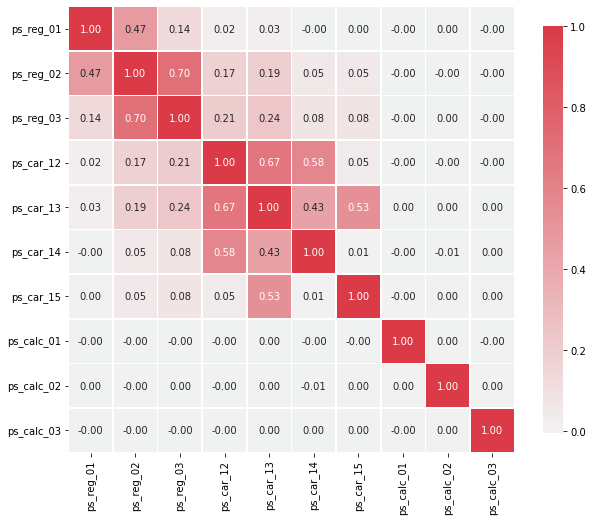

In [23]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
corr_heatmap(v)

# 눈에 띄는 상관관계가 많이 보이지는 않음 (다중공선성은 없어보임)
# 높은 상관관계 : ps_reg_02&ps_reg_03 (0.7) / ps_car_13&ps_car_12 (0.67) / ps_car_14&ps_car12 (0.58) / ps_car_15&ps_car_13 (0.53)

In [14]:
# heatmap에서 유의한 관계가 보였던 변수들을 집중적&직접적으로 살펴보자
# process speed를 높이기 위해 train data의 샘플(전체의 10% 정도를)을 뽑아 사용하고자함
s = train.sample(frac=0.1)

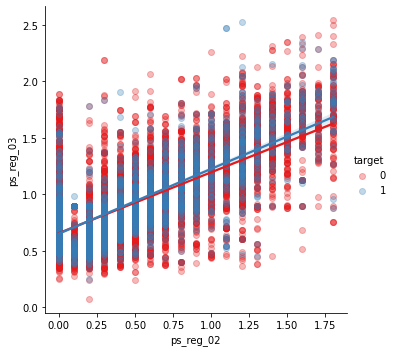

In [25]:
# ps_reg_02 and ps_reg_03
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1',scatter_kws={'alpha':0.3}) # 기본 옵션 order=1이 적용된 상태(1차 회귀식) / order=2 : 2차 회귀식
plt.show()

# lmplot : curve fitting 결과를 시각화해서 보여줌

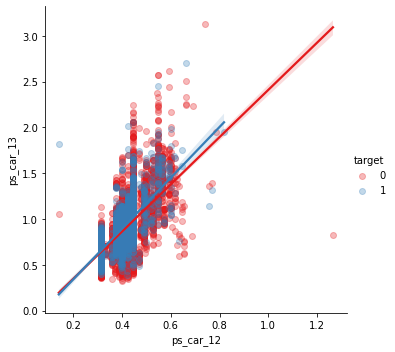

In [26]:
# ps_car_12 & ps_car_13
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3}) # scatter_kws{'alpha':0.3} : 스캐터 점의 사이즈를 조절
plt.show()

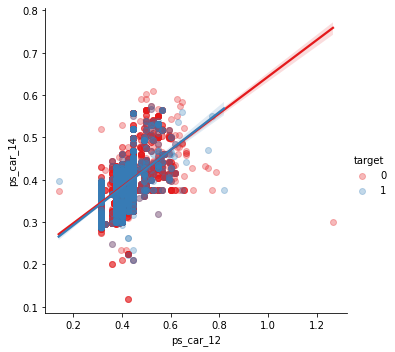

In [27]:
# ps_car_12 & ps_car_14
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

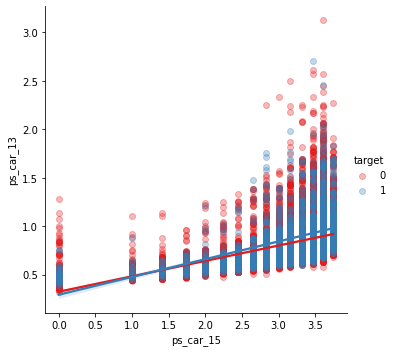

In [28]:
# ps_car_13 & ps_car_15
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

# 상관관계에 있는 변수가 많은 경우 PCA 등을 적용해 차원을 줄일 수 있지만 이 데이터셋의 경우 옾은 상관관계에 있는 변수가 많지 않으므로 그대로 두기로 결정

## Checking the correlations between ordinal variabels

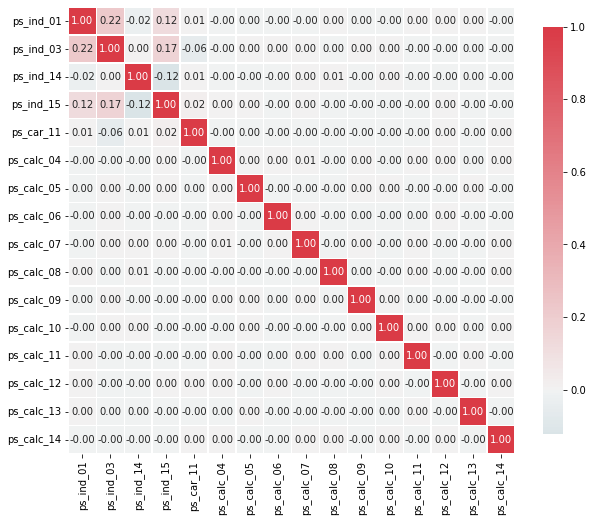

In [29]:
v = meta[(meta.level == 'ordinal')&(meta.keep)].index
corr_heatmap(v)

# 눈에 띄는 상관관계는 없음

# Feature Engineering

## creating dummy varables
The values of the categorical variables do not represent any order or magnitude. For istance, category 2 is not twice the value of category 1. Therefore we can create dummy variables generated for the categories of the original variable.

In [ ]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))

train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

# 총 52개의 더미 변수가 생성되었음

Before dummification we have 57 variables in train


## Creating interaction variables

In [ ]:
v = meta[(meta.level == 'interval')&(meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias = False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v))  # get_feature_names : 변수명을 가져오는 기능
interactions.drop(v, axis=1, inplace=True) # Remove the original columns

# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

# extra interaction variables를 train data에 추가

# PolyFeatures에 대한 설명
# 다항회귀 모델 생성기로 degree로 몇차 다항회귀를 만들것인지 결정, interaction_only : True로 둘 경우 interaction 항만 생성, include_bias : True로 할 경우 0차항도 함께 생성
# poly에 저장해두고 이를 활용하기 위해서는 poly.fit_transform(data) 형태로 사용

### Feature Selection

## Removing features with low or zero variance

알고리즘이 알아서 변수 선택을 할 수 있지만, 사전에 살 수 있는 것은 no or a very low variance를 갖는 변수들을 삭제하는 것이다.
sklearn의 VarianceThreshold가 해당 기능을 제공하며, default로 0 분산을 삭제함.
우리가 사용하는 데이터에는 0분산은 없지만 1% 분산에 해당하는 변수들은 있으므로 이를 활용하고자함.

In [ ]:
selector = VarianceThreshold(threshold=0.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variabels have too low variance.'.format(len(v)))
print('These variabels are {}'.format(list(v)))


# 여기 이해하는 것부터 시작하기..!

## Selecting features with a Random Forest and SelectFromModel

Here we'll base feature selection on the feature inporances of a random forest. With Sklearn's SelectFromModel you can then specify how many variables you want to keep. You can set a threshold on the level of feature importance manually. But we'll simply select the top 50% best variables.



In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train

rf = RandomForestClassifier(n_estimators = 1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.featrue_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]) :
  print("%2d) %-*s %f" %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]])) 


In [ ]:
# With 'SelectFromModel', we can specify which prefit classifier to use and what the threshold is for the feature importances. 
# With the 'get_support' method we can then limit the number of variabels in the train data.

print('Numbder of features before selection: {}'.format(X_train.shape[1])) # 전 : 162개의 변수 존재

sfm = SelectFromModel(rf, threshold='median', prefit=True)
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features)) # 후 : default로 50%를 선택하기로로 했으므로 81개가가 선택되었음
selected_vars = list(feat_labels[sfm.get_support()])

In [ ]:
train = train[selected_vars + ['target']] # 선택된된 변수와와 target값으로로 이뤄진진 최종 train set을 생성

# Feature scaling
As mentioned before, we can apply standard scaling to the training data, Some Classifiers perform better when this is done.

In [ ]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target']) # target을 제외한 변수들에 scaling 적용